In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import os

In [2]:
file_path = '/content/drive/MyDrive/x-ray.zip'

In [3]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/x-ray.zip'

extract_to = '/content/drive/MyDrive/5114'

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Files extracted to:", extract_to)


Files extracted to: /content/drive/MyDrive/5114


In [4]:
data_dir = "/content/drive/MyDrive/5114/Data"
train_dir = "/content/drive/MyDrive/5114/Data/train"
test_dir = "/content/drive/MyDrive/5114/Data/test"

print("Contents of data_dir:", os.listdir(data_dir))
print("Contents of train_dir:", os.listdir(train_dir))
print("Contents of test_dir:", os.listdir(test_dir))

Contents of data_dir: ['test', 'train']
Contents of train_dir: ['COVID19', 'NORMAL', 'PNEUMONIA']
Contents of test_dir: ['COVID19', 'NORMAL', 'PNEUMONIA']


In [5]:

train_dir = "/content/drive/MyDrive/5114/Data/train"
covid_count = len(os.listdir(os.path.join(train_dir, "COVID19")))
normal_count = len(os.listdir(os.path.join(train_dir, "NORMAL")))
pneumonia_count = len(os.listdir(os.path.join(train_dir, "PNEUMONIA")))

print(f"COVID-19 images count: {covid_count}")
print(f"Normal images count: {normal_count}")
print(f"Pneumonia images count: {pneumonia_count}")


COVID-19 images count: 460
Normal images count: 1266
Pneumonia images count: 3418


In [6]:
test_dir = "/content/drive/MyDrive/5114/Data/test"

covid_count_test = len(os.listdir(os.path.join(test_dir, "COVID19")))
normal_count_test = len(os.listdir(os.path.join(test_dir, "NORMAL")))
pneumonia_count_test = len(os.listdir(os.path.join(test_dir, "PNEUMONIA")))

print(f"COVID-19 test images count: {covid_count_test}")
print(f"Normal test images count: {normal_count_test}")
print(f"Pneumonia test images count: {pneumonia_count_test}")


COVID-19 test images count: 116
Normal test images count: 317
Pneumonia test images count: 855


In [7]:
pneumonia_sample = imread(os.path.join(train_dir, "PNEUMONIA", "PNEUMONIA(3189).jpg"))
normal_sample = imread(os.path.join(train_dir, "NORMAL", "NORMAL(342).jpg"))
covid_sample = imread(os.path.join(train_dir, "COVID19", "COVID19(189).jpg"))

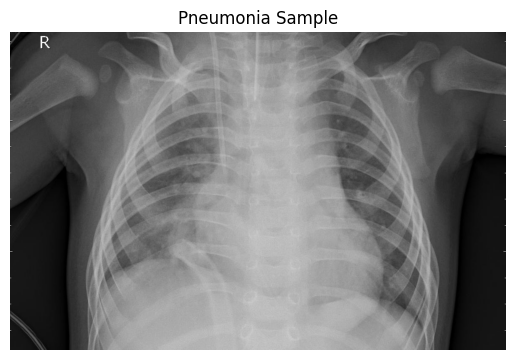

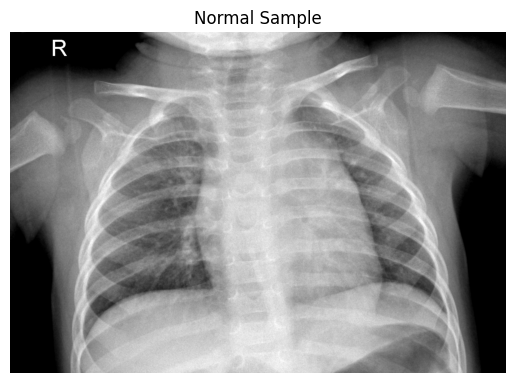

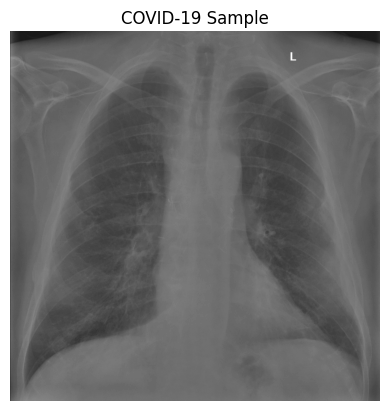

In [8]:
plt.imshow(pneumonia_sample)
plt.title('Pneumonia Sample')
plt.axis('off')
plt.show()

plt.imshow(normal_sample)
plt.title('Normal Sample')
plt.axis('off')
plt.show()

plt.imshow(covid_sample, cmap='gray')
plt.title('COVID-19 Sample')
plt.axis('off')
plt.show()

In [9]:
covid_sample.shape

(2000, 2000)

In [10]:
pneumonia_sample.shape

(760, 1184, 3)

In [11]:
normal_sample.shape

(1013, 1472, 3)

In [12]:
hei = []
wid = []

for image_name in os.listdir(train_dir+"/PNEUMONIA"):
    img = imread(train_dir+"/PNEUMONIA/"+image_name)
    h,w,c = img.shape
    hei.append(h)
    wid.append(w)

<Axes: >

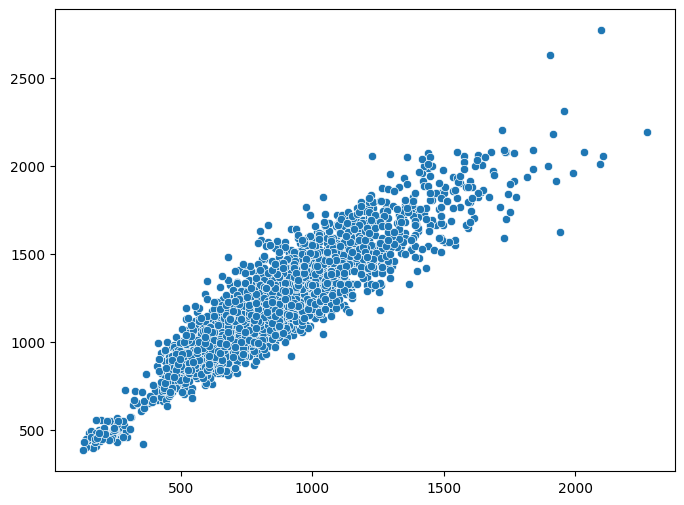

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=hei, y=wid)

In [14]:
np.mean(hei)

828.5772381509655

In [15]:
np.mean(wid)

1189.5617320070216

In [16]:
imageavg_size = (400,400,3)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
img_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.3,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1/255,
)

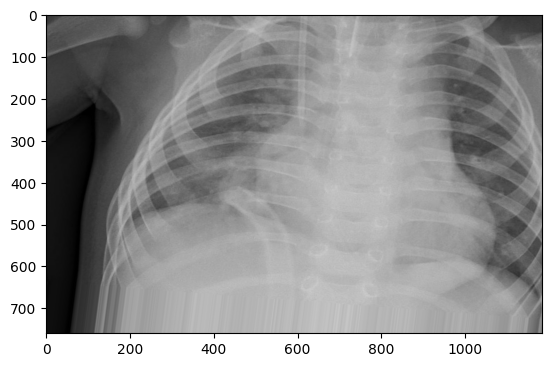

In [19]:
#testing pneumonia sample
plt.imshow(img_generator.random_transform(pneumonia_sample))

In [20]:
img_generator.flow_from_directory(test_dir)

Found 1288 images belonging to 3 classes.


In [21]:
img_generator.flow_from_directory(train_dir)

Found 5144 images belonging to 3 classes.


In [22]:
train_generator = img_generator.flow_from_directory (
    train_dir,
    target_size=imageavg_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)

Found 5144 images belonging to 3 classes.


In [23]:
test_generator = img_generator.flow_from_directory (
    test_dir,
    target_size=imageavg_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)

Found 1288 images belonging to 3 classes.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = imageavg_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = imageavg_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = imageavg_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 132, activation = "relu"))
model.add(Dense(units = 60, activation = "relu"))
model.add(Dense(units = 3, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [26]:
stop = EarlyStopping(monitor='val_loss', patience=15,mode='min')

In [27]:
history= model.fit(train_generator, validation_data=test_generator, epochs=20, callbacks=[stop])


Epoch 1/20
161/161 [==============================] - 388s 2s/step - loss: 0.6073 - accuracy: 0.7379 - val_loss: 0.5076 - val_accuracy: 0.8067
Epoch 2/20
161/161 [==============================] - 329s 2s/step - loss: 0.4283 - accuracy: 0.8252 - val_loss: 0.4069 - val_accuracy: 0.8548
Epoch 3/20
161/161 [==============================] - 329s 2s/step - loss: 0.3940 - accuracy: 0.8418 - val_loss: 0.3526 - val_accuracy: 0.8680
Epoch 4/20
161/161 [==============================] - 323s 2s/step - loss: 0.3513 - accuracy: 0.8563 - val_loss: 0.3588 - val_accuracy: 0.8750
Epoch 5/20
161/161 [==============================] - 327s 2s/step - loss: 0.3333 - accuracy: 0.8690 - val_loss: 0.2954 - val_accuracy: 0.8913
Epoch 6/20
161/161 [==============================] - 328s 2s/step - loss: 0.3055 - accuracy: 0.8847 - val_loss: 0.2996 - val_accuracy: 0.8944
Epoch 7/20
161/161 [==============================] - 324s 2s/step - loss: 0.2991 - accuracy: 0.8839 - val_loss: 0.3561 - val_accuracy: 0.8719

In [30]:
model.save("FinalModel.Keras")

In [33]:
from google.colab import files

# Specify the path to the file you want to download
file_path = '/content/FinalModel.Keras'

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [35]:
model.metrics_names

['loss', 'accuracy']

<Axes: >

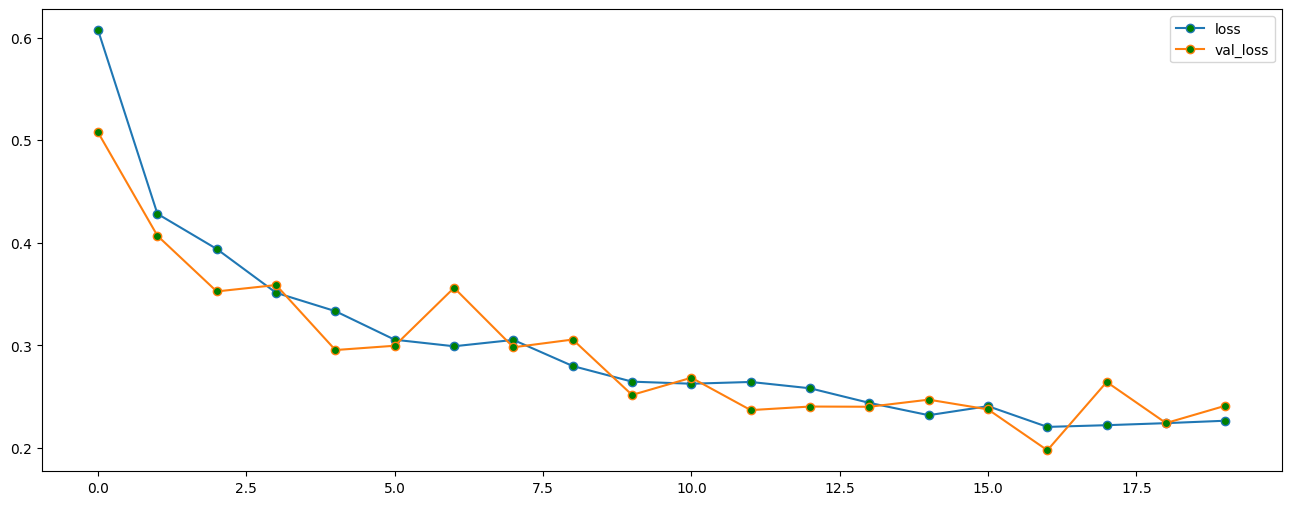

In [36]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot(figsize =(16,6), marker = "o", mfc = "g")

<Axes: >

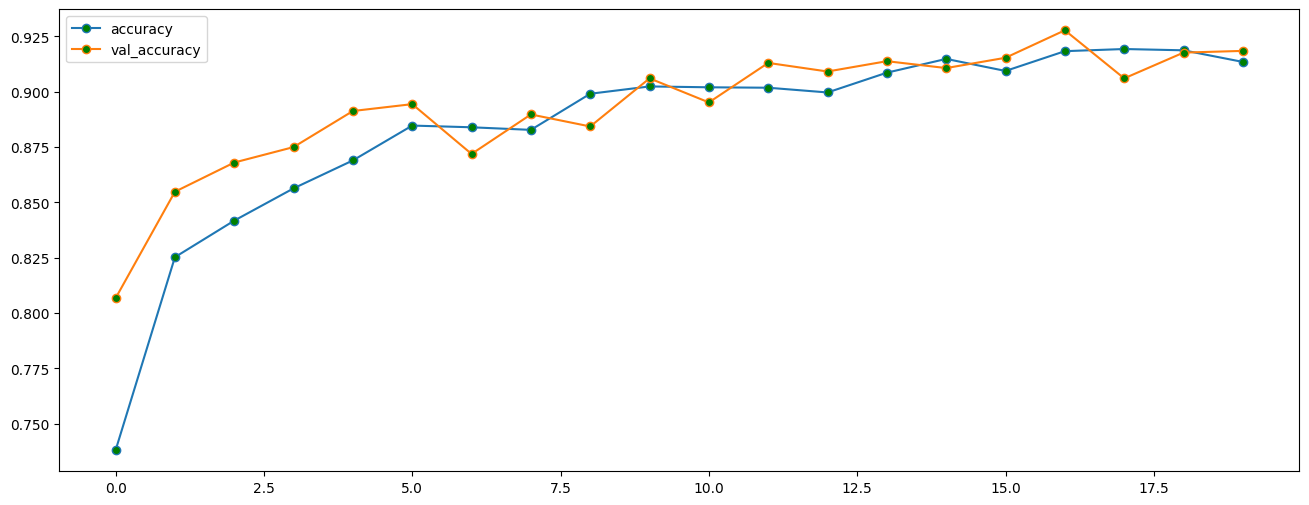

In [37]:
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot(figsize =(16,6), marker = "o", mfc = "g")

In [38]:
predictions = model.predict(test_generator)

41/41 [==============================] - 67s 2s/step


In [39]:
predictions

array([[8.8722342e-01, 5.8723498e-02, 5.4053083e-02],
       [9.5973611e-01, 3.0976664e-02, 9.2871990e-03],
       [8.7518656e-01, 2.9216608e-02, 9.5596917e-02],
       ...,
       [1.6881799e-03, 3.4951261e-01, 6.4879924e-01],
       [5.2909904e-08, 3.9988443e-02, 9.6001148e-01],
       [5.5743240e-02, 3.6275096e-02, 9.0798163e-01]], dtype=float32)

In [40]:
pred_labels = np.argmax(predictions, axis = 1)

In [41]:
len(test_generator.classes)

1288

In [42]:
len(pred_labels)

1288

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
print(classification_report(test_generator.classes, pred_labels))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       116
           1       0.83      0.90      0.86       317
           2       0.96      0.93      0.95       855

    accuracy                           0.93      1288
   macro avg       0.91      0.92      0.91      1288
weighted avg       0.93      0.93      0.93      1288



In [45]:
from tensorflow.keras.preprocessing import image

In [46]:
from random import randint
random_index = randint(1, len(os.listdir(train_dir+"/COVID19")))
random_covid_image_name = os.listdir(train_dir+"/COVID19")[random_index]

In [47]:
random_covid_image_name

'COVID19(217).jpg'

In [48]:
covid_img_path = train_dir+"/COVID19/"+random_covid_image_name

In [50]:
random_covid_img = image.load_img(covid_img_path, target_size=imageavg_size)

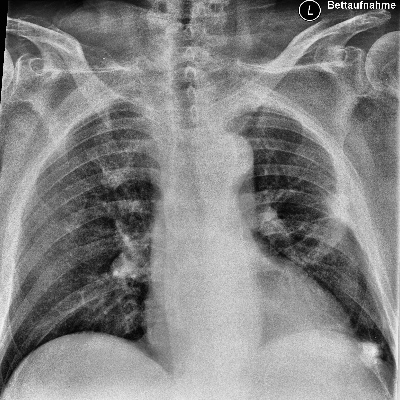

In [51]:
random_covid_img

In [52]:
random_covid_img_array = image.img_to_array(random_covid_img)

In [53]:
random_covid_img_array.shape

(400, 400, 3)

In [54]:
covid_img_array = np.expand_dims(random_covid_img_array, axis=0)

In [55]:
covid_img_array.shape

(1, 400, 400, 3)

In [56]:
np.argmax(model.predict(covid_img_array), axis =1)

1/1 [==============================] - 1s 682ms/step


array([0])

In [57]:
test_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}